+ Name: Vanshita Mahajan
+ Roll Number: 2021101102

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [28]:
np.random.seed(40)

In [29]:
excel_file_path = 'BRSM_Results Visualization.xlsx'
df1 = pd.read_excel(excel_file_path)

In [30]:
data = {
    "Beer": [27, 19, 20, 20, 23, 17, 21, 24, 31, 26, 28, 20, 27, 19, 25, 31, 24, 28, 24, 29, 21, 21, 18, 27, 20],
    "Water": [21, 19, 13, 22, 15, 22, 15, 22, 20, 12, 24, 24, 21, 19, 18, 16, 23, 20]
}

group_beer = np.array(data["Beer"])
group_water = np.array(data["Water"])

In [31]:
observed_diff_mean = np.mean(group_beer) - np.mean(group_water)
observed_diff_median = np.median(group_beer) - np.median(group_water)
combined_data = np.concatenate([group_beer, group_water])

observed_diff_mean, observed_diff_median

(4.37777777777778, 4.0)

In [32]:
num_iterations = 10000

In [33]:
np.random.seed(40)

def permutation_test(combined_data, num_iterations, flag=""):
    permuted_diffs = np.zeros(num_iterations)
    permuted_t_stats = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        np.random.shuffle(combined_data)
    
    # Split into permuted groups
        permuted_group_beer = combined_data[:len(group_beer)]
        permuted_group_water = combined_data[len(group_beer):]
        
        # Calculate difference in medians for each permuted sample
        if(flag == "median"):
            permuted_diffs[i] = np.median(permuted_group_beer) - np.median(permuted_group_water)

        elif(flag == "t_test"):
            permuted_t_statistic, _ = stats.ttest_ind(permuted_group_beer, permuted_group_water)
            permuted_t_stats[i] = permuted_t_statistic
        
    if(flag == "median"):
        return permuted_diffs
    else:
        return permuted_t_stats


### a. Permuation Test on Medians

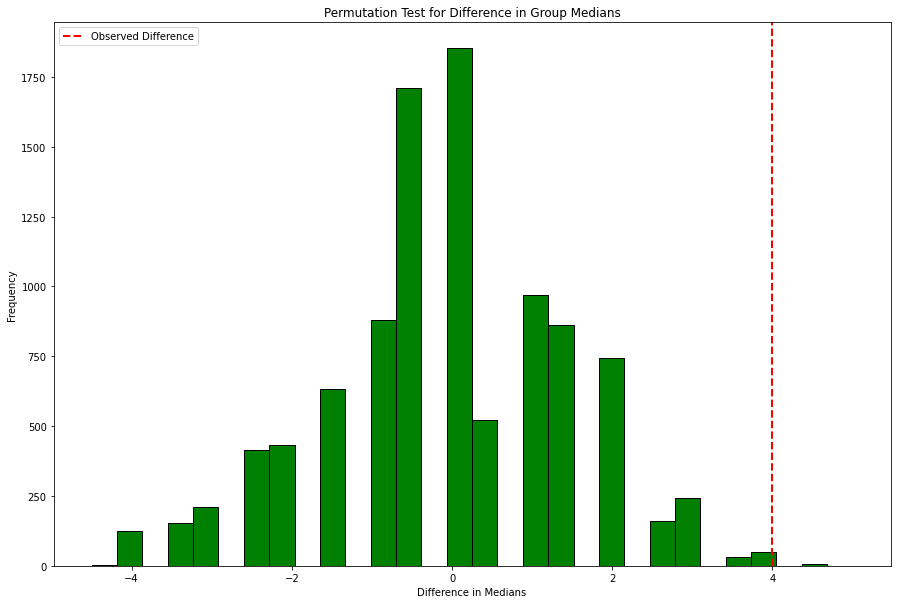

Observed Difference in Medians: 4.0
p-value: 0.0054


In [34]:
permuted_diffs = permutation_test(combined_data, num_iterations, flag="median")

# Calculate p-value

count = 0

for diff in permuted_diffs:
    if(diff >= observed_diff_median):
        count +=1
        
p_value = count / len(permuted_diffs)

plt.figure(figsize = (15,10))

plt.hist(permuted_diffs, bins=30, edgecolor='black', color="green")
plt.axvline(observed_diff_median, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.title('Permutation Test for Difference in Group Medians')
plt.xlabel('Difference in Medians')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f'Observed Difference in Medians: {observed_diff_median}')
print(f'p-value: {p_value}')


### b. Permutation test on t-statistic

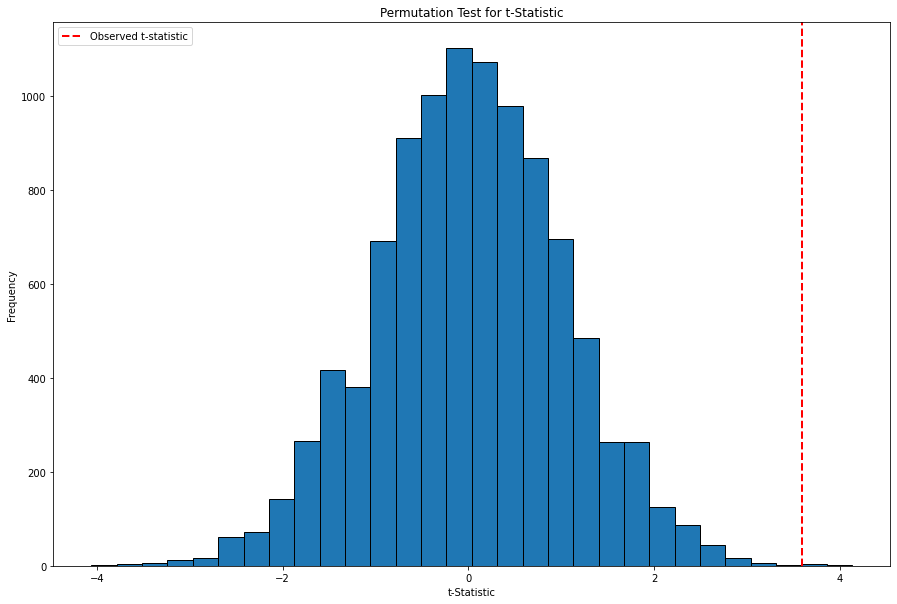

Observed t-Statistic: 3.5869843832143413
p-value for t-Statistic: 0.0005


In [35]:
# Compute observed t-statistic
observed_t_statistic, _ = stats.ttest_ind(group_beer, group_water)

permuted_t_stats = permutation_test(combined_data, num_iterations, flag = "t_test")

#  P-Value

count = 0 

for i in permuted_t_stats:
    if(i >= observed_t_statistic):
        count += 1
    
p_value_t_statistic = count / len(permuted_t_stats)

plt.figure(figsize=(15, 10))
plt.hist(permuted_t_stats, bins=30, edgecolor='black')
plt.axvline(observed_t_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed t-statistic')
plt.title('Permutation Test for t-Statistic')
plt.xlabel('t-Statistic')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f'Observed t-Statistic: {observed_t_statistic}')
print(f'p-value for t-Statistic: {p_value_t_statistic}')

### c. Non Directional HA

In [36]:
permuted_diffs = permutation_test(combined_data, num_iterations, flag="median")

count = 0
for i in permuted_diffs:
    if(i >= observed_diff_median or i <= -observed_diff_median):
        count+=1

p_value_2_tailed = count / len(permuted_diffs)

print(f'Observed Difference in Medians: {observed_diff_median}')
print(f'p-value non directional: {p_value_2_tailed}')


Observed Difference in Medians: 4.0
p-value non directional: 0.0174


### 3.

In [37]:
df2 = pd.read_excel("Hypothesis testing data.xlsx")
df2

,Unnamed: 0,GPA,IQ,GENDER,TESTSCORE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Exerice_Times,Exercise code,Anxiety
0,1,7.940,111,2,67,NaN,NaN,NaN,0.0,0.0,21.0
1,2,8.292,107,2,43,NaN,NaN,NaN,0.0,0.0,11.0
2,3,4.643,100,2,52,NaN,NaN,NaN,0.0,0.0,12.0
3,4,7.470,107,2,66,NaN,NaN,NaN,0.0,0.0,28.0
4,5,8.882,114,1,58,NaN,NaN,NaN,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
73,85,9.000,112,1,60,NaN,NaN,NaN,NaN,NaN,NaN
74,86,9.500,112,1,70,NaN,NaN,NaN,NaN,NaN,NaN
75,87,6.057,114,2,51,NaN,NaN,NaN,NaN,NaN,NaN
76,88,6.057,93,1,21,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
iq_scores = df2['IQ']
test_scores = df2['TESTSCORE']

observed_corr = np.corrcoef(iq_scores, test_scores)[0, 1]


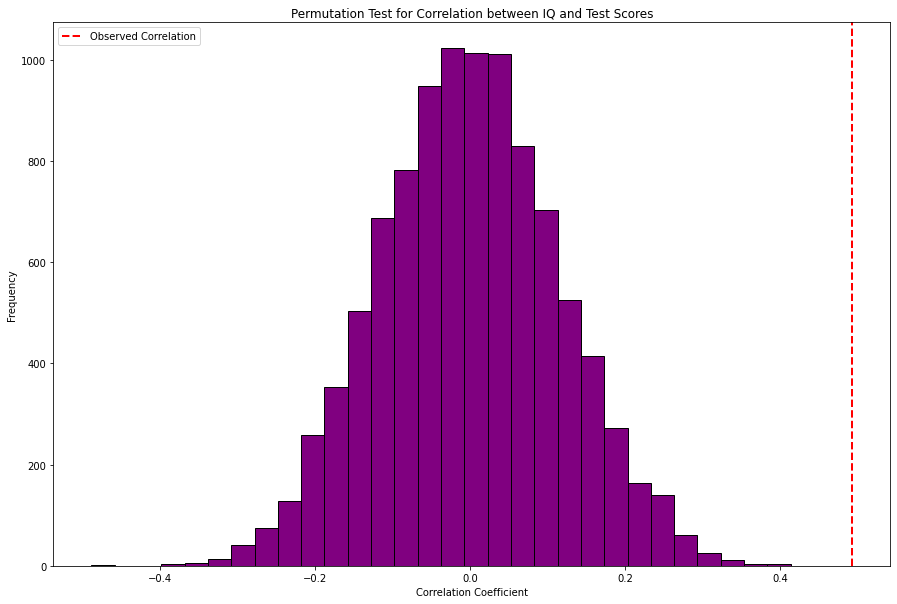

Observed Correlation: 0.4931479069133802
p-value: 0.0
Since p value is less than alpha, we reject the null hypothesis: There is a significant correlation between IQ and Test Scores.


In [39]:
num_permutations = 10000
permuted_correlations = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(test_scores.values)
    
    # Calculate correlation for each permuted sample
    permuted_corr = np.corrcoef(iq_scores, test_scores)[0, 1]
    permuted_correlations[i] = permuted_corr

# p-value
    
count = 0

for i in permuted_correlations:
    if(i>= observed_corr):
        count +=1
        
p_value = count / len(permuted_correlations)


plt.figure(figsize = (15,10))

plt.hist(permuted_correlations, bins=30, edgecolor='black', color = "purple")
plt.axvline(observed_corr, color='red', linestyle='dashed', linewidth=2, label='Observed Correlation')
plt.title('Permutation Test for Correlation between IQ and Test Scores')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f'Observed Correlation: {observed_corr}')
print(f'p-value: {p_value}')

# Determine whether to reject or accept the null hypothesis
alpha = 0.05
if p_value < alpha:
    print("Since p value is less than alpha, we reject the null hypothesis: There is a significant correlation between IQ and Test Scores.")
else:
    print("Since p value is >= alpha, we accept the null hypothesis: There is no significant correlation between IQ and Test Scores.")